### Imports

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



### Load Salary Data

In [43]:
csv_file = 'salaries.csv'
salary_data = pd.read_csv(csv_file)

In [44]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3006 non-null   int64 
 1   experience_level    3006 non-null   object
 2   employment_type     3006 non-null   object
 3   job_title           3006 non-null   object
 4   salary              3006 non-null   int64 
 5   salary_currency     3006 non-null   object
 6   salary_in_usd       3006 non-null   int64 
 7   employee_residence  3006 non-null   object
 8   remote_ratio        3006 non-null   int64 
 9   company_location    3006 non-null   object
 10  company_size        3006 non-null   object
dtypes: int64(4), object(7)
memory usage: 258.5+ KB


In [45]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


### Data Exploration

In [46]:
missing = pd.concat([salary_data.isnull().sum(), 100 * salary_data.isnull().mean()], axis=1)
print(missing)

                    0    1
work_year           0  0.0
experience_level    0  0.0
employment_type     0  0.0
job_title           0  0.0
salary              0  0.0
salary_currency     0  0.0
salary_in_usd       0  0.0
employee_residence  0  0.0
remote_ratio        0  0.0
company_location    0  0.0
company_size        0  0.0


It seems like our dataframe has no missing values at first glance.

In [47]:
salary_data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Categorical Data 

##### Experience level

In [48]:
salary_data['experience_level'].unique()

array(['EN', 'MI', 'SE', 'EX'], dtype=object)

In [49]:
salary_data['experience_level'].value_counts()

SE    1988
MI     679
EN     256
EX      83
Name: experience_level, dtype: int64

EN: Entry-level / Junior

MI: Mid-level / Intermediate

SE: Senior-level / Expert

EX: Executive-level / Director


##### Employment type

In [50]:
salary_data['employment_type'].unique()

array(['FT', 'FL', 'PT', 'CT'], dtype=object)

In [51]:
salary_data['employment_type'].value_counts()

FT    2972
PT      17
FL       9
CT       8
Name: employment_type, dtype: int64

PT: Part-time

FT: Full-time

CT: Contract

FL: Freelance

##### Job title

In [52]:
salary_data['job_title'].value_counts()

Data Engineer                    826
Data Scientist                   667
Data Analyst                     491
Machine Learning Engineer        242
Data Architect                    77
                                ... 
Software Data Engineer             1
Cloud Data Architect               1
Autonomous Vehicle Technician      1
Power BI Developer                 1
Azure Data Engineer                1
Name: job_title, Length: 89, dtype: int64

##### Salary currency

In [53]:
salary_data['salary_currency'].unique()

array(['USD', 'EUR', 'GBP', 'BRL', 'INR', 'THB', 'PLN', 'CAD', 'SGD',
       'HUF', 'CHF', 'AUD', 'CZK', 'DKK', 'JPY', 'MXN', 'TRY', 'CLP'],
      dtype=object)

In [54]:
salary_data['salary_currency'].value_counts().head()

USD    2529
EUR     216
GBP     141
INR      55
CAD      23
Name: salary_currency, dtype: int64

##### Employee residence

ISO 3166 country code

In [55]:
salary_data['employee_residence'].unique()

array(['US', 'ES', 'SI', 'GB', 'CA', 'NG', 'DE', 'MX', 'FR', 'UZ', 'IN',
       'BR', 'PT', 'TH', 'GH', 'HR', 'PL', 'KW', 'VN', 'IE', 'NL', 'SE',
       'SG', 'CY', 'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'AU',
       'PK', 'IT', 'MA', 'CO', 'LT', 'BE', 'AS', 'IR', 'HU', 'CH', 'AT',
       'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR', 'FI', 'DK', 'BO', 'PH',
       'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE', 'HN', 'TN', 'RU', 'DZ',
       'IQ', 'UA', 'BG', 'JE', 'RS', 'NZ', 'HK', 'MD', 'LU', 'MT'],
      dtype=object)

In [56]:
salary_data['employee_residence'].value_counts().head()

US    2347
GB     145
ES      70
CA      64
IN      63
Name: employee_residence, dtype: int64

##### Company location

In [57]:
salary_data['company_location'].unique()

array(['US', 'ES', 'SI', 'GB', 'CA', 'NG', 'DE', 'MX', 'FR', 'AU', 'IN',
       'BR', 'PT', 'RU', 'TH', 'GH', 'HR', 'VN', 'IE', 'NL', 'SE', 'SG',
       'EE', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'PL', 'CO', 'AL', 'AR', 'LT', 'AS', 'CR', 'IR', 'BS', 'HU', 'CH',
       'AT', 'SK', 'CZ', 'TR', 'PR', 'FI', 'DK', 'BO', 'PH', 'BE', 'ID',
       'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ', 'IQ', 'UA', 'CN', 'NZ',
       'CL', 'MD', 'IL', 'MT'], dtype=object)

In [58]:
salary_data['company_location'].value_counts().head()

US    2382
GB     149
ES      68
CA      65
IN      52
Name: company_location, dtype: int64

##### Company size

In [59]:
salary_data['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [60]:
salary_data['company_size'].value_counts()

M    2474
L     392
S     140
Name: company_size, dtype: int64

S: less than 50 employees (small)
M: 50 to 250 employees (medium)
L: more than 250 employees (large)

### Numerical Data

##### Work year

In [61]:
salary_data['work_year'].value_counts()

2022    1657
2023    1044
2021     230
2020      75
Name: work_year, dtype: int64

##### Salary

In [62]:
salary_data['salary_in_usd'].describe()

count      3006.000000
mean     134282.715569
std       62764.987716
min        5000.000000
25%       91427.750000
50%      130000.000000
75%      172339.500000
max      450000.000000
Name: salary_in_usd, dtype: float64

##### Remote ratio

In [63]:
salary_data['remote_ratio'].value_counts()

0      1440
100    1387
50      179
Name: remote_ratio, dtype: int64

0: No remote work (less than 20%)

50: Partially remote

100: Fully remote (more than 80%)

### Relationships

##### Top employee residences for remote workers

In [64]:
salary_data[salary_data['remote_ratio']==100]['employee_residence'].value_counts().head()

US    1083
GB      53
CA      36
IN      35
ES      22
Name: employee_residence, dtype: int64

##### Distribution of Numerical Values

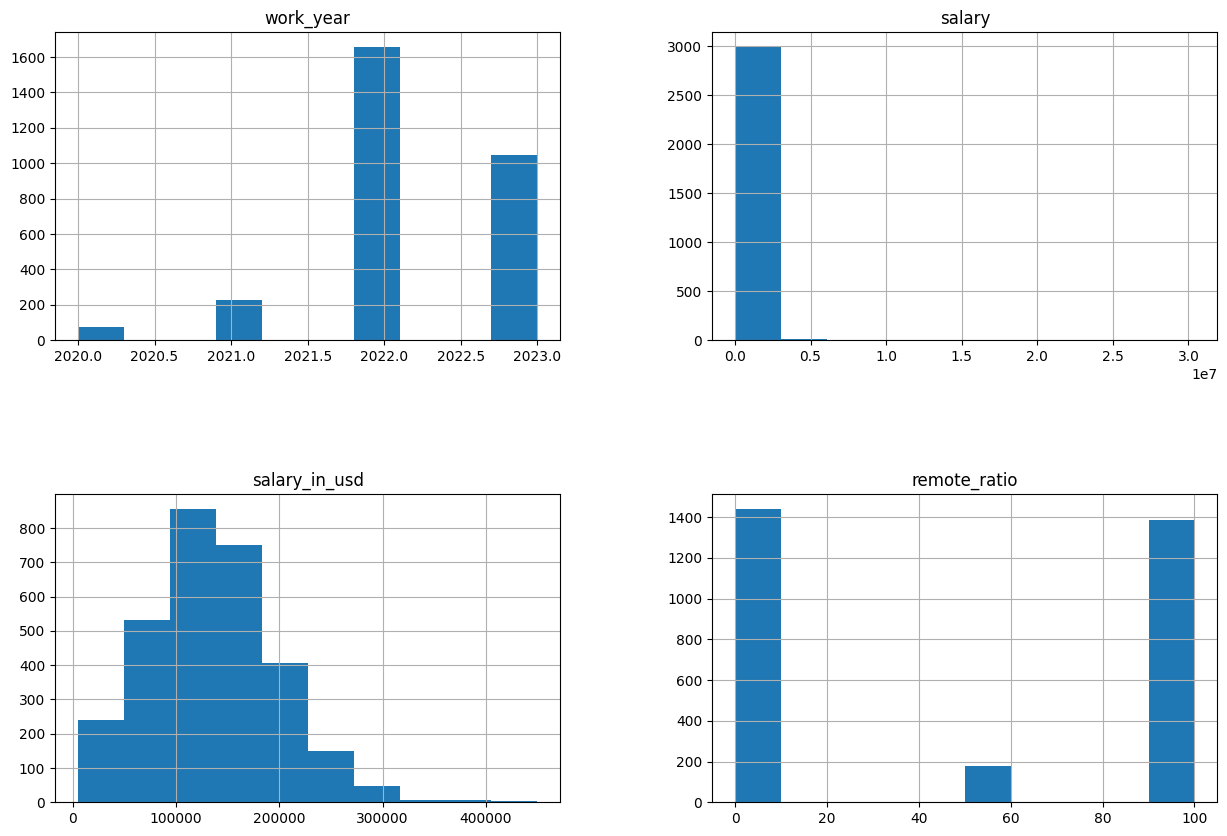

In [65]:
salary_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### Data Cleaning

##### Dropping 'salary' and 'salary_currency' column in favor of 'salary_in_usd'

In [66]:
clean_salary = salary_data.drop(['salary', 'salary_currency'], axis=1)
clean_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,US,100,US,M


##### Salary Outliers

In [67]:
salaries = clean_salary['salary_in_usd']
q1=salaries.quantile(0.25)
q3=salaries.quantile(0.75)

IQR=q3-q1

salary_outliers = salaries[((salaries<(q1-1.5*IQR)) | (salaries>(q3+1.5*IQR)))]
salary_outliers.describe()

count        47.000000
mean     333145.680851
std       43426.437252
min      297300.000000
25%      300000.000000
50%      310000.000000
75%      360000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

##### Changing relevant data types to categories

In [68]:
clean_salary['work_year'] = clean_salary['work_year'].astype('category')
clean_salary['remote_ratio'] = clean_salary['remote_ratio'].astype('category')
clean_salary['experience_level'] = clean_salary['experience_level'].astype('category')
clean_salary['employment_type'] = clean_salary['employment_type'].astype('category')
clean_salary['company_size'] = clean_salary['company_size'].astype('category')

In [69]:
clean_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3006 non-null   category
 1   experience_level    3006 non-null   category
 2   employment_type     3006 non-null   category
 3   job_title           3006 non-null   object  
 4   salary_in_usd       3006 non-null   int64   
 5   employee_residence  3006 non-null   object  
 6   remote_ratio        3006 non-null   category
 7   company_location    3006 non-null   object  
 8   company_size        3006 non-null   category
dtypes: category(5), int64(1), object(3)
memory usage: 109.6+ KB


In [70]:
clean_salary.isna().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

### Save clean data

In [71]:
clean_salary.to_csv('clean_salary.csv')